<a href="https://colab.research.google.com/github/MercyNgila/Pump-It-Up/blob/main/Pump%20It%20Up%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Introduction**

In this Project, I will complete a machine learning workflow using classification solutions, including data preparation, modeling (including hyperparameter tuning), and final model evaluation.

# 2. Business Understanding

## 2.1. Problem

Water shortage in Tanzania has been a problem for years now. The most affected are the rural areas. One out of six people lack access to safe drinking water in Tanzania (WHO/UNICEF, 2004). 

According to UNICEF, It is estimated that Tanzania spends 70 per cent of its health budget on preventable Water, Sanitation and Hygiene (WASH) related diseases as the majority of the population does not have access to improved sanitation, and close to half of the population does not have access to clean drinking water.

As part of its Vision 2025, the Government of Tanzania has pledged to increase access to improved sanitation to 95 per cent by 2025. The Second Five Year Development Plan (FYDP II) has also set the target for access to improved sanitation facilities at 85 per cent in rural areas.

UNICEF is working with the Tanzanian Government and development partners on four priority WASH areas:
 1. To ensure access to improved sanitation and hygiene in rural and peri-urban communities.
 2. Develop sustainable solutions for provision of WASH facilities in health and educational institutions.
 3. Ensure sustainable and equitable access to safe drinking water in rural and periurban areas.
 4. Provide effective response in emergencies to prevent the spread of diseases due to poor sanitation, unhygienic living conditions and unsafe drinking water.



## 2.2. Aim
There are many water wells already established across different parts of the country. 

To achieve the third priority WASH areas goal, there is need to know the conditions of the waterpumps in these water wells which would advice the best strategy moving forward.. Visiting each well to establish their conditions would be highly costly and time consuming. 

The Tanzanian Government in partnership with UNICEF has contracted my consulting company, Nangila Analytics, to create a machine learning (ML) model to predict conditions of waterpumps ranking them in three levels:
- Functional
- Non Functional
- Functional needs repair

This ML model will be used to choose the best strategy moving forward.

## 2.3. Objectives

- To build a ML model that predicts the conditions of water pumps with an acceptably high accuracy.
- To compare different ML models predictions to achieve highest accuracy
- Advice the client on best strategy

# 3. Data Understanding

The data that I will use for this project contains information on 59,400 waterpoints and comes from the Taarifa waterpoints dashboard, which has been aggregated from the Tanzania Ministry of Water.

Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues. It acts a a bug tracker for real world which helps to engage citizens with their local government. It has been working on an Innovation Project in Tanzania, with various partners.

There are three datasets for this project:
 1. Training set labels 
 2. Training set values 
 3. Test set values 

For this project I will use datasets 1 & 2. 

The target variable will be status_group which details the functionality of waterpoints.

Features include:

- amount_tsh           - Amount used in construction of wells
- date_recorded         - The date the row was entered
- funder                - Who funded the well
- gps_height            - Altitude of the well
- installer             - Organization that installed the well
- longitude             - GPS coordinate
- latitude              - GPS coordinate
- wpt_name              - Name of the waterpoint if there is one
- num_private           - No description
- basin                 - Geographic water basin
- subvillage            - Geographic location
- region                - Geographic location
- region_code           - Geographic location (coded)
- district_code         - Geographic location (coded)
- lga                   - Geographic location
- ward                  - Geographic location
- population            - Population around the well
- public_meeting        - True/False
- recorded_by           - Group entering this row of data
- scheme_management     - Who operates the waterpoint
- scheme_name           - Who operates the waterpoint
- permit                - If the waterpoint is permitted
- construction_year     - Year the waterpoint was constructed
- extraction_type       - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management            - How the waterpoint is managed
- management_group      - How the waterpoint is managed
- payment               - What the water costs
- payment_type          - What the water costs
- water_quality         - The quality of the water
- quality_group         - The quality of the water
- quantity              - The quantity of water
- quantity_group        - The quantity of water
- source                - The source of the water
- source_type           - The source of the water
- source_class          - The source of the water
- waterpoint_type       - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint





# 4. Requirements

1. Data Preparation
       - Loading Libraries
       - Loading data
       - Descriptive Exploration
       - Data Cleaning
       - Exploratory Descriptive Analysis (EDA)
       - Pre-processing Data
2.  Modelling
        - Train test split
        - Baseline Model
        - Random Forest
        - Decision Tree
        - Logistic Regression
        - Evaluation
4.  Conclusion
5.  Recommendation

# 5. Loading Data

## 5.1. Loading Relevant Libraries
- Loading all relevant libraries for this notebook

In [348]:
# Connect colab to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [349]:
#load relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report
from sklearn.metrics import log_loss, accuracy_score, roc_curve, auc, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, GridSearchCV

## 5.2. Loading Datasets
- Loading datasets

In [350]:
# Loading datasets
train_values = pd.read_csv('/content/drive/MyDrive/Github Data/pumpit_training_set.csv', index_col = 0)
train_labels = pd.read_csv('/content/drive/MyDrive/Github Data/pumpit_training_labels.csv', index_col = 0)

## 5.3 Explore dataframes
- Descriptive exploration of data

In [351]:
# Expand view of dataframe
pd.set_option('display.max_columns', None)
# Check head of dataframe
train_values.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [352]:
# Check head of dataframe
train_labels.head(3)

,status_group
id,
69572,functional
8776,functional
34310,functional


In [353]:
# Merge dataframes
train = train_values.merge(train_labels, how = 'inner', on = 'id')

#### Observation
- There seems to be duplicated columns with same information but different column names in the dataframe.

In [354]:
#Check dataframe shapes
print('Train:', train.shape)

Train: (59400, 40)


In [355]:
# Chech train dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [356]:
# Check train dataframe description
train.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


# 6. Data Cleaning

To use my data for medelling, I will have to employ data cleaning methods to make it ready and suitable.
Methods to be employed are :

- Consistency
- Validity
- Completeness
- Collinearity


## 6.1. Consistency
- Checking to see there are any duplicates both in rows and in columns.

In [357]:
# Checking for duplicates in rows
# With id as a unique identifier it makes it easier to identify duplicates
print(f'There are {train.duplicated().sum()} duplicates')

There are 36 duplicates


In [358]:
#drop all duplicates in rows
train.drop_duplicates(inplace=True)

As mentioned earlier there are columns that seem to have repeated information.
I will explore these columns to assertain if they are indeed duplicated then drop some of them.

In [359]:
# Get unique values for columns
train.apply(lambda x: len(x.unique())).to_frame()

,0
amount_tsh,98
date_recorded,356
funder,1898
gps_height,2428
installer,2146
longitude,57516
latitude,57517
wpt_name,37400
num_private,65
basin,9


#### Waterpoint

In [360]:
# Check value counts
train['waterpoint_type'].value_counts().to_frame()

,waterpoint_type
communal standpipe,28516
hand pump,17466
other,6377
communal standpipe multiple,6099
improved spring,783
cattle trough,116
dam,7


In [361]:
# Check value counts
train['waterpoint_type_group'].value_counts().to_frame()

,waterpoint_type_group
communal standpipe,34615
hand pump,17466
other,6377
improved spring,783
cattle trough,116
dam,7


In [362]:
# Both columns have the same data
# Communal standpipe and standpipe multiple are merged in waterpoint type group
# I will drop one of the columns. 
train = train.drop(['waterpoint_type'],axis=1)

#### Source

In [363]:
# Check value counts
train['source'].value_counts().to_frame()

,source
spring,17020
shallow well,16801
machine dbh,11069
river,9612
rainwater harvesting,2293
hand dtw,874
lake,763
dam,655
other,211
unknown,66


In [364]:
# Check value counts
train['source_type'].value_counts().to_frame()

,source_type
spring,17020
shallow well,16801
borehole,11943
river/lake,10375
rainwater harvesting,2293
dam,655
other,277


In [365]:
# Check value counts
train['source_class'].value_counts().to_frame()

,source_class
groundwater,45764
surface,13323
unknown,277


In [366]:
# Source and source type have similar data 
# Some values are merged in the source type column
# I will drop one of the columns
train = train.drop(['source'],axis=1)

#### Quantity

In [367]:
# Check value counts
train['quantity'].value_counts().to_frame()

,quantity
enough,33165
insufficient,15119
dry,6243
seasonal,4048
unknown,789


In [368]:
# Check value counts
train['quantity_group'].value_counts().to_frame()

,quantity_group
enough,33165
insufficient,15119
dry,6243
seasonal,4048
unknown,789


In [369]:
# Both columns have the same data
# I will drop one of the columns. 
train = train.drop(['quantity_group'],axis=1)

#### Quality

In [370]:
# Check value counts
train['water_quality'].value_counts().to_frame()

,water_quality
soft,50785
salty,4856
unknown,1873
milky,804
coloured,490
salty abandoned,339
fluoride,200
fluoride abandoned,17


In [371]:
# Check value counts
train['quality_group'].value_counts().to_frame()

,quality_group
good,50785
salty,5195
unknown,1873
milky,804
colored,490
fluoride,217


In [372]:
# Source and source type have similar data 
# Some values are merged in the quality group column
# I will drop one of the columns
train = train.drop(['water_quality'],axis=1)

#### Payment

In [373]:
# Check value counts
train['payment'].value_counts().to_frame()

,payment
never pay,25337
pay per bucket,8984
pay monthly,8300
unknown,8134
pay when scheme fails,3914
pay annually,3642
other,1053


In [374]:
# Check value counts
train['payment_type'].value_counts().to_frame()

,payment_type
never pay,25337
per bucket,8984
monthly,8300
unknown,8134
on failure,3914
annually,3642
other,1053


In [375]:
# Both columns have the same data
# I will drop one of the columns. 
train = train.drop(['payment'],axis=1)

#### Management

In [376]:
# Check value counts
train['management'].value_counts().to_frame()

,management
vwc,40493
wug,6495
water board,2933
wua,2535
private operator,1971
parastatal,1766
water authority,904
other,844
company,685
unknown,561


In [377]:
# Check value counts
train['management_group'].value_counts().to_frame()

,management_group
user-group,52456
commercial,3638
parastatal,1766
other,943
unknown,561


In [378]:
# Source and source type have similar data 
# Some values are merged in the management group column
# I will drop one of the columns
train = train.drop(['management'],axis=1)

#### Extraction

In [379]:
# Check value counts
train['extraction_type'].value_counts().to_frame()

,extraction_type
gravity,26776
nira/tanira,8143
other,6427
submersible,4759
swn 80,3663
mono,2865
india mark ii,2398
afridev,1769
ksb,1413
other - rope pump,451


In [380]:
# Check value counts
train['extraction_type_group'].value_counts().to_frame()

,extraction_type_group
gravity,26776
nira/tanira,8143
other,6427
submersible,6172
swn 80,3663
mono,2865
india mark ii,2398
afridev,1769
rope pump,451
other handpump,364


In [381]:
# Check value counts
train['extraction_type_class'].value_counts().to_frame()

,extraction_type_class
gravity,26776
handpump,16434
other,6427
submersible,6172
motorpump,2987
rope pump,451
wind-powered,117


In [382]:
# Source and source type have similar data 
# Some values are merged in the extraction type class column
# I will drop two of the columns
train = train.drop(['extraction_type', 'extraction_type_group'],axis=1)

#### Geography

In [383]:
# There are too many columns representing geographical data
# e.g. gps_height, longitude, latitude, region_code and district_code
# These are less likely to add any predictive power to the model
# I will drop some of these columns
train = train.drop(['gps_height', 'region_code', 'district_code', 'ward', 'source_type'], axis=1)

## 6.2. Validity
- Check to see if all the columns in the dataset are valid/useful for this analysis
- Dropping any that isn't useful.

#### num_private and wpt_name

- 'num_private' hasn't been given a description on Driven Data, it appears to be superflous.
- 'waterpoint_type_group' can be dropped to leave 'wpt_name'
-  I will drop these columns

In [384]:
# Drop columns
train = train.drop(['num_private', 'wpt_name'], axis=1)

#### recorded_by
- The values in this column are same. 
- There is no point to go forward with this column.

In [385]:
# Check value counts
train['recorded_by'].value_counts().to_frame()

,recorded_by
GeoData Consultants Ltd,59364


In [386]:
# Drop column
train = train.drop(['recorded_by'],axis=1)

#### Construction Year

- I will turn construction_year into a categorical column containing the following values: '60s', '70s','80s', '90s, '00s', '10s', 'unknown'.

In [387]:
# Define a grouping function
def construction_grouping(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train['construction_year'] = train.apply(lambda row: construction_grouping(row), axis=1)

#### Date recorded
- Date recorded is in object form.
- I will convert 'date_recorded' into records of days since it was recorded

In [388]:
# Get days from since recorded
train.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train.date_recorded)
train.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train.columns]
train.days_since_recorded = train.days_since_recorded.astype('timedelta64[D]').astype(int)

#### Status Group
- We only need to non functional and well that finction but need repair
- I will drop functional wells

In [389]:
# Check unique values in status group
train['status_group'].value_counts().to_frame()

,status_group
functional,32237
non functional,22813
functional needs repair,4314


In [390]:
# Drop functional wells
train = train.loc[train['status_group'] != 'functional']

## 6.3. Completeness
- Check to see if there are any missing/null values, and impute them.

In [391]:
# Define a function to get missing data
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data

In [392]:
# print missing columns on training test
missing_data(train)

funder                1654
installer             1655
subvillage             166
public_meeting        1648
scheme_management     2004
scheme_name          13668
permit                1383
dtype: int64

To get a better understanding of how to deal with the missing values, I will explore the columns further. 

#### funder column

In [393]:
# get value counts
train['funder'].value_counts().to_frame()

,funder
Government Of Tanzania,5361
Danida,1401
Hesawa,1265
World Bank,804
Rwssp,569
...,...
Tajiri Jumbe Lila,1
Morad,1
Domestic Rural Development Pr,1
Dwe/ubalozi Wa Marekani,1


In [394]:
# I will group the column into 6 categories. The top 5 value counts and the rest in other

def funder_grouping(dataframe):
    if dataframe['funder'] == 'Government Of Tanzania':
        return 'government'
    elif dataframe['funder'] == 'Danida':
        return 'danida'
    elif dataframe['funder'] == 'Hesawa':
        return 'hesawa'
    elif dataframe['funder'] == 'Rwssp':
        return 'rwssp'
    elif dataframe['funder'] == 'World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
train['funder'] = train.apply(lambda row: funder_grouping(row), axis=1)

#### installer column

In [395]:
# get value counts
train['installer'].value_counts().to_frame()

,installer
DWE,7965
Government,1288
RWE,901
DANIDA,508
KKKT,476
...,...
Africa Muslim Agenc,1
WINAM CO,1
Howard and Humfrey Consultants,1
-,1


In [396]:
# I will group the column into 6 categories. The top 5 value counts and the rest in other
def installer_grouping(dataframe):
    if dataframe['installer'] == 'DWE':
        return 'dwe'
    elif dataframe['installer'] == 'Government':
        return 'government'
    elif dataframe['installer'] == 'RWE':
        return 'rwe'
    elif dataframe['installer'] == 'Commu':
        return 'commu'
    elif dataframe['installer'] == 'DANIDA':
        return 'danida'    
    else:
        return 'other'
    
train['installer'] = train.apply(lambda row: installer_grouping(row), axis=1)

#### subvillage

In [397]:
# get value counts
# It is harder to divide this column since we have no dominating values
train['subvillage'].value_counts().to_frame()

# probably better off dropping this column

,subvillage
Shuleni,274
Majengo,268
Madukani,256
Kati,158
Sokoni,121
...,...
Nyabusaro,1
Isandula A,1
Msongwe,1
Mwibari,1


In [398]:
train = train.drop(['subvillage'],axis = 1)

#### public meeting

In [399]:
# get value counts
train['public_meeting'].value_counts().to_frame()

,public_meeting
True,22597
False,2882


In [400]:
# There are more trues that Falses. 
# I will fill the missing values with Unknown
train.public_meeting = train.public_meeting.fillna('Unknown')

#### scheme management

In [401]:
# get value counts
train['scheme_management'].value_counts().to_frame()

,scheme_management
VWC,17828
WUG,2192
Water authority,1535
WUA,888
Parastatal,713
Water Board,695
Company,527
Private operator,334
Other,308
SWC,77


In [402]:
# There are too many categories in this column
# I will divide it into 6 categories with 5 being the top 5 and the rest in other

def scheme_grouping(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management'] == 'VWC':
        return 'vwc'
    elif row['scheme_management'] == 'WUG':
        return 'wug'
    elif row['scheme_management'] == 'Water authority':
        return 'water_authority'
    elif row['scheme_management'] == 'WUA':
        return 'wua'
    elif row['scheme_management'] == 'Water Board':
        return 'water_board'
    else:
        return 'other'

train['scheme_management'] = train.apply(lambda row: scheme_grouping(row), axis=1)

#### scheme name

In [403]:
# get value counts
train['scheme_name'].value_counts().to_frame()

,scheme_name
Borehole,342
K,306
None,232
M,203
Ngana water supplied scheme,200
...,...
Kibo sterio water supply,1
Mradi wa Maji Kitaraka,1
C,1
Ballaa pipe line,1


In [404]:
# Check unique values
len(train.scheme_name.unique())

1856

In [405]:
# It is harder to divide this column since we have no dominating values
# its better to drop the column
train = train.drop('scheme_name', axis = 1)

#### permit

In [406]:
# get value counts
train['permit'].value_counts().to_frame()

,permit
True,17306
False,8438


In [407]:
# There are more trues that Falses. 
# I will fill the missing values with Unknown
train.permit = train.permit.fillna('Unknown')



Checking for missing values again in both the train and test data



In [408]:
# Check for missing data
missing_data(train)

Series([], dtype: int64)



Great! There are no more missing values

In [409]:
# Get a general outlook of cleaned train data
train.head()

,amount_tsh,days_since_recorded,funder,installer,longitude,latitude,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_class,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,
67743,0.0,309,other,other,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,vwc,True,80s,submersible,user-group,never pay,good,dry,groundwater,communal standpipe,non functional
19816,0.0,428,other,other,33.362410,-3.766365,Internal,Shinyanga,Shinyanga Rural,0,True,vwc,True,unknown,handpump,user-group,never pay,good,enough,groundwater,hand pump,non functional
54551,0.0,420,rwssp,dwe,32.620617,-4.226198,Lake Tanganyika,Shinyanga,Kahama,0,True,other,True,unknown,handpump,user-group,unknown,milky,enough,groundwater,hand pump,non functional
53934,0.0,395,other,other,32.711100,-5.146712,Lake Tanganyika,Tabora,Tabora Urban,0,True,vwc,True,unknown,handpump,user-group,never pay,salty,seasonal,groundwater,hand pump,non functional
48451,500.0,883,other,dwe,34.642439,-9.106185,Rufiji,Iringa,Njombe,35,True,wua,True,70s,gravity,user-group,monthly,good,dry,surface,communal standpipe,non functional


In [410]:
# get shape of cleaned train data
train.shape

(27127, 22)

# 7. Exploratory Data Analysis (EDA)

In trying to understand our data better, let's check for the distribution of the individual features in our dataset.

Answer a few questions:

1. What is the distribution of status of wells?
2. Does location have an impact on well functionality?
3. Does a water source, water quality, quantity and extraction type affect functionality?
4. What is the relationship between functionality and money spent?
5. Does proximity to a water basin affect functionality?
6. Does construction periods have an effect on functionality?





## 7.1. Distribution of well status

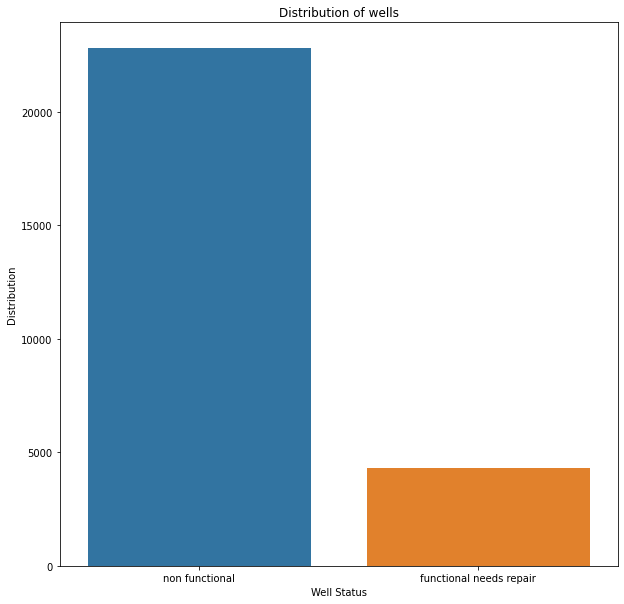

In [411]:
# Plot graph
fig,ax = plt.subplots(figsize = (10, 10))
sns.countplot(data = train, x = 'status_group')
ax.set_title('Distribution of wells')
ax.set_xlabel('Well Status') 
ax.set_ylabel('Distribution');

- There are more non functiional wells that there are funtional wells that need repairs.
- The data is imbalanced.

## 7.2. Location effect on functionality

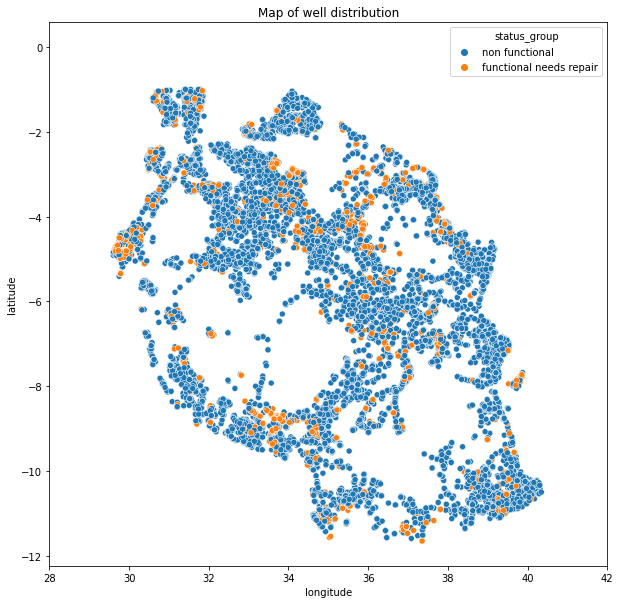

In [412]:
# Plot graph
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(data = train, x = 'longitude', y = 'latitude', hue = 'status_group')
ax.set_xlim(28,42)
ax.set_title('Map of well distribution')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude');

- The non functional wells are clustered across many parts of the country
- Functional wells that need repairs are scattered across the country but in less clusters compared to non functional wells. 

## 7.3. Water source, water quality, quantity effect and extraction type on well functionality

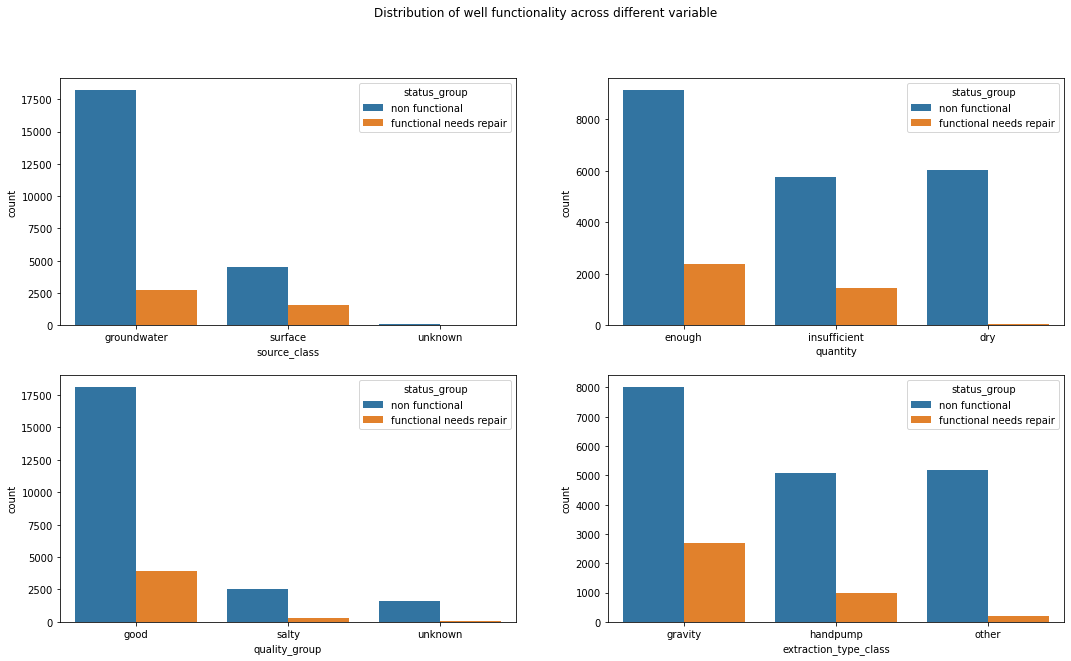

In [413]:
# Plot graph
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))

ax1 = sns.countplot(data = train, x = 'source_class', hue = 'status_group', ax = axes[0, 0]), 

ax2 = sns.countplot(data = train, x = 'quality_group', hue = 'status_group', 
                    order = train['quality_group'].value_counts().iloc[:3].index, ax = axes[1, 0])

ax3 = sns.countplot(data = train, x = 'quantity', hue = 'status_group', 
                    order = train['quantity'].value_counts().iloc[:3].index, ax = axes[0, 1])

ax4 = sns.countplot(data = train, x = 'extraction_type_class', hue = 'status_group', 
                    order = train['extraction_type_class'].value_counts().iloc[:3].index, ax = axes[1, 1])

fig.suptitle('Distribution of well functionality across different variable');

- Groundwater have the most non functional wells amongst water sources.

- Most of the non functional wells have good and enough water. 

## 7.4. Relationship between wells functionality and money spent

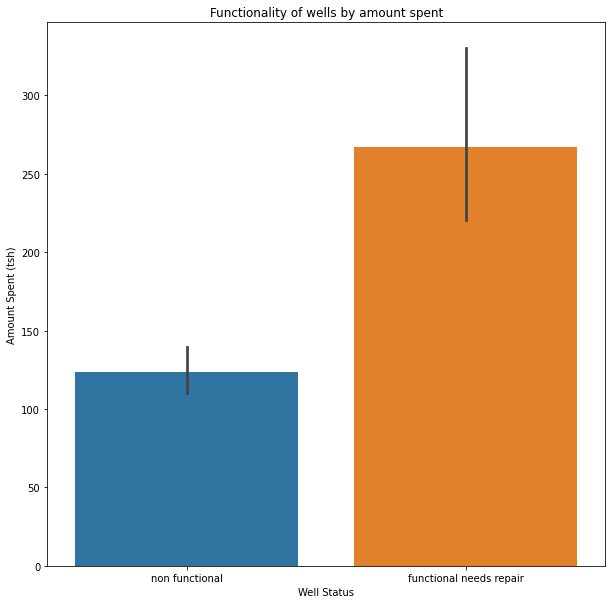

In [414]:
# Plot graph
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(data = train, x = 'status_group', y = 'amount_tsh')
plt.title('Functionality of wells by amount spent')
plt.xlabel('Well Status')
plt.ylabel('Amount Spent (tsh)');

- Wells that have more construction money spent on remain functional.


## 7.5. Proximity to water basin effect on wells functionality

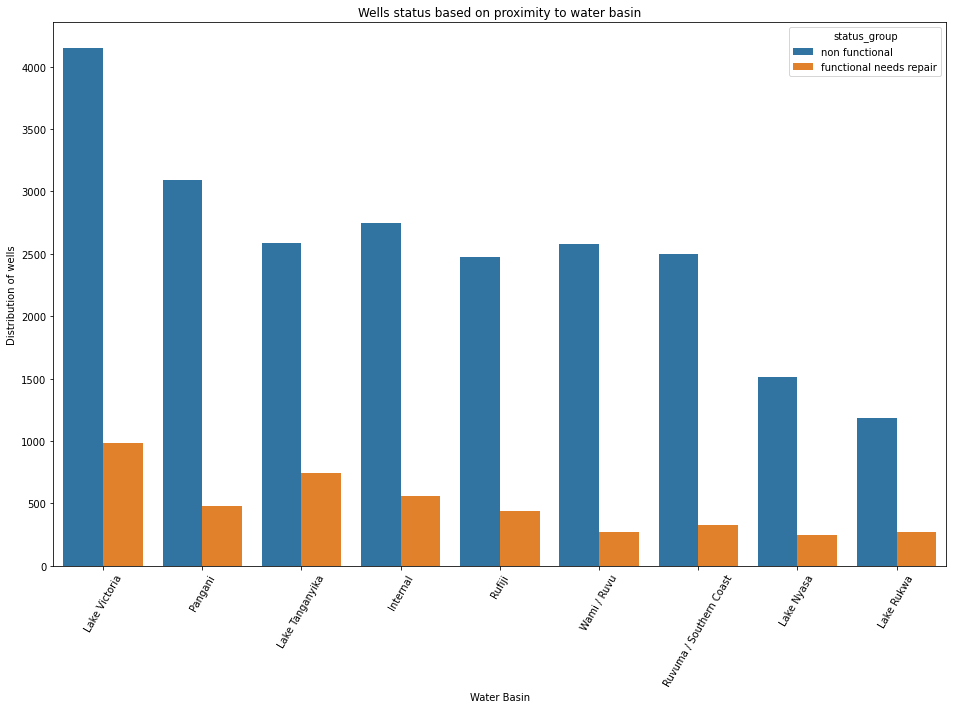

In [415]:
# Plot graph
fig, ax = plt.subplots(figsize = (16, 10))
sns.countplot(data = train, x = 'basin', hue = 'status_group', 
              order = train.basin.value_counts().index)
plt.title('Wells status based on proximity to water basin')
plt.xticks(rotation = 60)
plt.ylabel('Distribution of wells')
plt.xlabel('Water Basin');

- Wells in close proximity to Lake Victoria are the most non functional as well as the most functional that need repairs.


## 7.6. Population effect on wells functionality

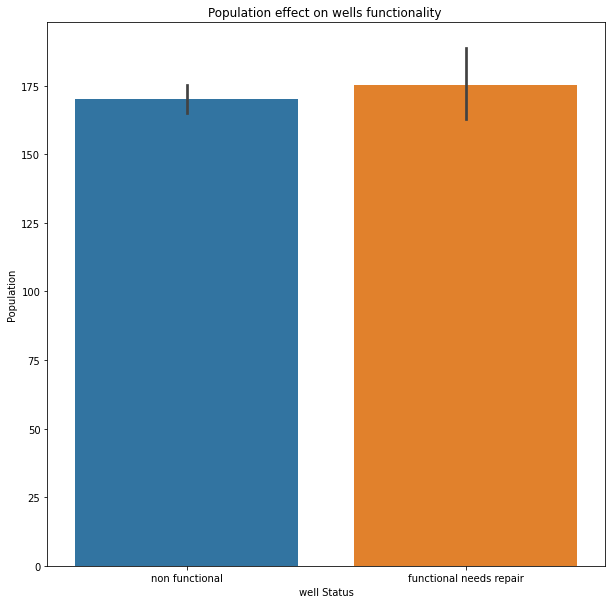

In [416]:
# Plot graph
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.barplot(data = train, y = 'population', x = 'status_group')
ax.set_title('Population effect on wells functionality ')
ax.set_ylabel('Population')
ax.set_xlabel('well Status');

- Population around the well does not seem to have a significant effect on the functionality of wells.

# 8. Pre-Processing Data
- Here I will drop some columns which may not be relevant for my modelling
- I will rank status of waterpumps as 0,1,2
- Create dummmies for categotical columns

## 8.1. Dropping non-relevant columns
- Some columns are less likely to add any predictive power to the model

In [417]:
# I will drop these columns
train = train.drop(['region', 'lga', 'basin', 'days_since_recorded', ], axis=1)

## 8.2. status_group
- I will label the target column with functional and non functional as 1 and 2

In [418]:
# Create a column assigning 0,1,2 for target variable
val_status_group={'functional needs repair':0,
                   'non functional':1}
train['status_group_vals']=train.status_group.replace(val_status_group)

In [419]:
# Drop column
train = train.drop(['status_group'],axis=1)

## 8.3. Create dummies
- Creating dummies for categorical columns

In [420]:
# Create dummies for caterogical columns
categoricals = ['funder', 'installer', 'public_meeting', 'scheme_management', 'permit',
              'construction_year', 'extraction_type_class','management_group', 'payment_type', 'quality_group',
              'quantity', 'source_class','waterpoint_type_group']

train = pd.get_dummies(train, columns = categoricals)


## 8.4. Splitting data into train and test
- I will the split data into training set which I will try out different models on and test set which will be applied on the best model.

In [421]:
# assigning X and y variables
X = train.drop('status_group_vals', axis = 1)
y = train.status_group_vals

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [422]:
# Explore shape of dataframe
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18988, 74)
(8139, 74)
(18988,)
(8139,)


## 8.4. Data Scaling

- The current data is mostly on different scales which will hinder the effectiveness of models.
- To correct this a standard scaler will be applied.

In [423]:
# Instantiate Standard Scaler
ss = StandardScaler()

# fit and transform train data
X_train_scaled = ss.fit_transform(X_train)

# Transform test data
X_test_scaled = ss.transform(X_test)

# Convert back scaled data into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_train_scaled, columns = X_test.columns, index = X_test.index)


## 8.5. Class Imbalance

- I will correct the class imbalance in the data

In [424]:
# Explore value counts y Variables
y_train.value_counts(normalize = True).to_frame()

,status_group_vals
1,0.841005
0,0.158995


The models will have an 84% chance of classifying wells as non functional. To correct this we will remove the imbalance.

In [425]:
# Using SMOTE to remove class imbalance
sm = SMOTE(random_state = 42)

# Fitting SMOTE to the y
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)


In [426]:
# Print new value counts
y_train_smote.value_counts().to_frame()

,status_group_vals
1,15969
0,15969


# 3. Modelling

The metric I will be using for modellling is Accuracy

For modelling I will apply:

### 1. Perform an X_Train-y_Test Split

### 2. Build and Evaluate a Baseline Model


### 3. Grid search to Find the Random Forest Model


### 4. Build Iterative Models to Find the Best Decision Tree Model

### 5. Build additional Logistic Regression Models


### 7. Choose and Evaluate a Final Model


## 3.1. Perform an X_Train-y_Test Split

In [106]:
# Create y_train and X_train
y = train.status_group_vals
X = train.drop('status_group_vals', axis=1)

In [ ]:
# check the dummy accuracy of the raw data
print("Raw Counts")
print(train["status_group_vals"].value_counts())
print()
print("Percentages")
print(train["status_group_vals"].value_counts(normalize=True))

Raw Counts
2    32259
0    22824
1     4317
Name: status_group_vals, dtype: int64

Percentages
2    0.543081
0    0.384242
1    0.072677
Name: status_group_vals, dtype: float64


functional - 0.54304

functional needs repair - 0.38429
                   
non functional - 0.07267

Dummy Accuracy =  0.54304

Because 54.30% of the waterpoints are functional

Prediction of functional waterpoints would be at 54.30% accuracy

In [ ]:
# perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47520, 92)
(47520,)
(11880, 92)
(11880,)


## 3.2. Baseline Model
- Without performing any preprocessing or hyperparameter tuning, build and evaluate a several classification models then pick the top three for further tuning.

In [ ]:
# Create names for the different classification methods
rf = RandomForestClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
knn = KNeighborsClassifier()
nb = GaussianNB()

In [ ]:
# Create a function for classification
train_accuracy = []
test_accuracy = []
model_list = [rf,lr, dt, knn, nb]
for i in model_list:
    i = i.fit(X_train, y_train)
    ytrain_pred = i.predict(X_train)
    ytest_pred = i.predict(X_test)
    train_accuracy.append(accuracy_score(ytrain_pred, y_train))
    test_accuracy.append(accuracy_score(ytest_pred, y_test))

In [ ]:
# print train accuracy
train_accuracy

[0.9999158249158249,
 0.5429713804713805,
 1.0,
 0.6691498316498317,
 0.5797138047138047]

In [ ]:
# print test accuracy
test_accuracy

[0.7824074074074074,
 0.5435185185185185,
 0.7236531986531987,
 0.5042929292929293,
 0.5874579124579125]

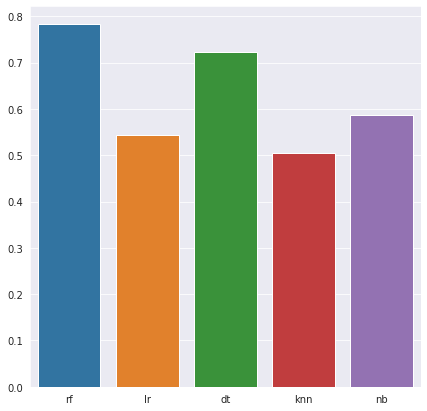

In [ ]:
# I will visualize the test accuracy results
model_names = ["rf","lr","dt","knn", "nb"]
plt.figure(figsize = (7, 7))
sns.barplot(x = model_names, y = test_accuracy)
plt.show()

### Summary of results

- Random Forest Classifier
      - Train Accuracy = 93.99%
      - Test Accuracy = 78.62%
- Logistic Regression Classifier
      - Train Accuracy = 71.84%
      - Test Accuracy = 71.95%
- Decision Tree accuracy 
      - Train Accuracy = 93.99%
      - Test Accuracy = 75.10%
- KNN accuracy 
      - Train Accuracy = 78.39%
      - Test Accuracy = 69.98%
- Gaussian accuracy
      - Train Accuracy = 62.34%
      - Test Accuracy =  62.87%


Using the test accuracy, the top perfoming models are:
- Random Forest Classifier (best)
- Decision Tree Classifier
- Logisitic Regression Classifier

- Random Forest and Decision Trees show high cases of overfitting. More tuning could improve these models.
- While Logistic regression has a lesser percentage in testing fit compared to the other two, it shows less chances of overfitting but it could be improved.
- I will perform more tuning to these three classification models to improve them

## 3.3. Random Forest
- I will employ hyperparameter tuning to improve model accuracy

- Using random search, I will carry out several iterations to get the best conditions for random forest and run them to get an accuracy.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [98]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf1_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
rf1_random.best_params_

In [ ]:
# Instantiate and fit a RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators = 36, min_samples_split = 5, 
                                 min_samples_leaf = 2, max_features = 'sqrt', max_depth = None, bootstrap = False,
                                 random_state = 42)
forest1.fit(X_train, y_train)
#ytrain_pred = forest1.predict(X_train)

# Training accuracy score
print('Train:', forest1.score(X_train, y_train))
print()
print('Test:', forest1.score(X_test, y_test))

### Random Forest results

- random model 1: 78.62%
- random model 2: 80.03%

- The second model is a better fit. 
- It has less overfitting.
- The random search did take some time to load though

## 3.4. Decision Tree Model
- I will carry out hyperparameter tuning to see what effect it has on the performance of our decision tree and to check whether it will improve the performance.
- To do this I will carry out a grid search to get the best parameters and apply them.
- I will further try using a bagging classifier to reduce noice and see if this would improve the model
- To check for the performance of the model, we will use ROC-AUC.

In [ ]:
#Using GridSearchCV
# Setting tuning parameters
par={
    'max_depth':[2, 4, 5, 10],
    'min_samples_leaf': [5, 15, 20, 50],
    'min_samples_split': [10, 20, 30, 40],
    'criterion':['gini','entropy']
}

In [ ]:
#Instantiating the grid search
D_tree = DecisionTreeClassifier()
g_search = GridSearchCV(estimator = D_tree,
                      param_grid = par,
                      scoring = 'accuracy', cv=5)

In [ ]:
#Fitting grid search
g_search.fit(X_train, y_train)

In [ ]:
# Getting best parameters
dt1 = g_search.best_estimator_
dt1 

In [ ]:
# Instatiate desicion tree
# Apply best parameters
dt1 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, min_samples_split=10, random_state = 42)
dt1.fit(X_train, y_train)
y_pred = dt1.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
# Previous model performed better
# I will now adjust more features
dt2 =  BaggingClassifier(DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 42))
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

### Decision Tree Train accuracy results
-  Decision Tree model 1 = 75.10%
-  Decision Tree model 2 = 73.88%
- Decision Tree model 3 = 74.56%

The first model performs better

## 3.5 Logistic Regression

- I will apply a standard scaler to transform the data and see if this would improve the accuracy

In [ ]:
# Instantiate scaler
ss = StandardScaler()

# Fit and transform train data
X_train_scaled = ss.fit_transform(X_train)

# Transform test data
X_test_scaled = ss.transform(X_test)

In [ ]:
#Fitting the model
lr.fit(X_train_scaled, y_train)

In [ ]:
# Get prediction
ytrain_pred= lr.predict(X_train_scaled)
ytest_pred = lr.predict(X_test_scaled)

# Check the accuracy score
print(accuracy_score(y_train, ytrain_pred))
print(accuracy_score(y_test, ytest_pred))

### Classification Report
- I will have a look at the classification report.

In [ ]:
probs = lr.predict_proba(X_test)


print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

- While the second model performs better, from the F1-score there seems to be an imbalance of data.
- I will employ SMOTE to correct this.

### SMOTE

In [ ]:
# #Using SMOTE to remove class imbalances
sm = SMOTE(random_state=42)

# Fit and transform X_train_scaled and y_train using sm
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print(y_train_smote.value_counts())

In [ ]:
# insantiating the model with the best parameters from grid search
lr_smote = lr

# fitting the model to the smote train

lr_smote.fit(X_train_smote, y_train_smote)

# Get prediction
ytest_pred = lr_smote.predict(X_test_scaled)

# Check the accuracy score
accuracy_score(y_test, ytest_pred)

### Logistic Regression test accuracy results
- LR model 1 = 71.95%
- LR model 2 = 72.57%
- LR model 3 = 63.04%

The second model performed better.

## 3.6. Evaluation

- Choosing the model that has the best performance, I will instantiate a final model with these best parameters.


In [ ]:
# Replace None with appropriate code
final_model = RandomForestClassifier(n_estimators = 36, min_samples_split = 5, 
                                 min_samples_leaf = 2, max_features = 'sqrt', max_depth = None, bootstrap = False,
                                 random_state = 42)

# Fit the model on the full training data
final_model.fit(X_train, y_train)

- I will now evaluate the log loss, accuracy, precision, and recall. 

In [ ]:
preds = final_model.predict(X_test)
probs = final_model.predict_proba(X_test)


print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
#print(classification_report(y_test, preds, digits=3))

- From the final model, we can now run a feature importance.
- This will help show which features matter most.
- I will list the top 10

In [ ]:
features = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)[:10]

# customized number 
num_features = 10 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation
- From the feature importance some features standout.
- Installer Danida stands out the most in key feature importance.
- Several other factors stand out e.g. coloured water quality, other source types, management groups that fall under unknown.


# Interpretation

##### dummy accuracy = 54.30%

##### final model accuracy = 80.03% 

The model has a 80.03% accuracy which is an improvement from the dummy.


# 4. Conclusion

- The final model (RandonForest) at 80.03% is a good prediction model that is ready for deployment. 
- The accuracy provides great insights on conditions of waterpoints that will aid greatly in planning, prioritising and investment.
- There are different qualities of water in the different functional pumps but most of them have soft water.
- All waterpoints with that had huge investment costs are functional
- Gravity and Hand pump water pumps are the most functional amongst communities.
- It is concerning that there the number of non functional water pumps is a lot

# 5. Recommendations

- With few functional waterpumps that need repairs, it would be a great investment opportunity to repair them before they turn non functional. The repair should however be accessed to know if it is cheaper repairing or having a new one.

- Futher investigation should be done on the highly technical water pumps to understand if communities would need training to use them and if they are sustainable due to costs involved. e.g Fuel Purchase.

- Priority could be placed on high population areas could be prioritised in more access to water and monitoring their waterpumps.

- More research could be done to understand what causes waterpumps to be non functional. This could help avoid setting up new waterpumps in areas where there were already.